In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

In [2]:
def load_epochs_losses(f, hist=True):
    if hist:
        files = (pathlib.Path(f) / 'hist.txt').read_text().split('\n')
    else:
        files = os.listdir(f)
    actual = [f for f in files if f.endswith('.pt')]
    epochs = []
    losses = []
    for f in actual:
        if 'batch' in f:
            continue
        f = f[:-3] # remove .pt
        _, epoch_str, loss_str = f.split('_')
        _, epoch = epoch_str.split('=')
        _, loss = loss_str.split('=')
        epochs.append(int(epoch))
        losses.append(float(loss))
    epochs = np.array(epochs)
    losses = np.array(losses)
    indices = np.argsort(epochs)
    epochs = epochs[indices]
    losses = losses[indices]
    return epochs, losses

In [4]:
# epochs_oneshot, losses_oneshot = load_epochs_losses('weights/dgmr_oneshot')
# epochs_oneshot_cc, losses_oneshot_cc = load_epochs_losses('weights/dgmr_oneshot_coordconv')
# epochs_oneshot_of, losses_oneshot_of = load_epochs_losses('weights/dgmr_oneshot_optflow/')

epochs_baseline, losses_baseline = load_epochs_losses('weights/dgmr_full_128_msssim_notransform', hist=False)
epochs_dct, losses_dct = load_epochs_losses('weights/dgmr_dct_full')


In [13]:
epochs_baseline=epochs_baseline[:13]
losses_baseline=losses_baseline[:13]

epochs_dct=epochs_dct[:13]
losses_dct=losses_dct[:13]


Text(0.5, 1.0, 'DCT-Trick Performance')

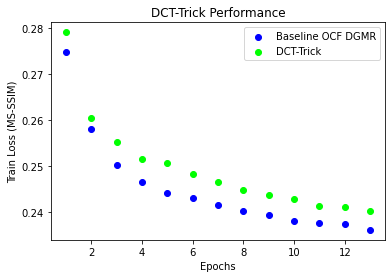

In [16]:
plt.scatter(epochs_baseline, losses_baseline, label='Baseline OCF DGMR', color='blue')
plt.scatter(epochs_dct, losses_dct, label='DCT-Trick', color='lime')
plt.xlabel('Epochs')
plt.ylabel('Train Loss (MS-SSIM)')
plt.legend()
plt.title('DCT-Trick Performance')

In [77]:
epochs = [50, 55, 60, 65, 70, 75, 79, 82, 87]

In [78]:
loss_os = []
loss_cc = []
loss_of = []

for e in epochs:
    idx_os = np.argwhere(epochs_oneshot==e)[0,0]
    loss_os.append(losses_oneshot[idx_os])
    
    idx_cc = np.argwhere(epochs_oneshot_cc==e)[0,0]
    loss_cc.append(losses_oneshot_cc[idx_cc])
    
    idx_of = np.argwhere(epochs_oneshot_of==e)[0,0]
    loss_of.append(losses_oneshot_of[idx_of])

Text(0.5, 1.0, 'CoordConv and Optical Flow As Features Performance')

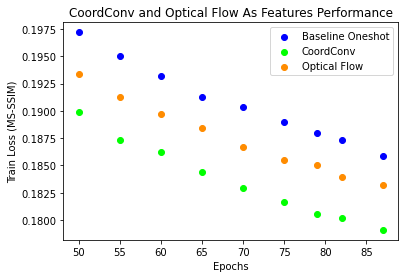

In [92]:
plt.scatter(epochs, loss_os, label='Baseline Oneshot', color='blue')
plt.scatter(epochs, loss_cc, label='CoordConv', color='lime')
plt.scatter(epochs, loss_of, label='Optical Flow', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Train Loss (MS-SSIM)')
plt.legend()
plt.title('CoordConv and Optical Flow As Features Performance')

In [94]:
loss_of = np.array(loss_of)
loss_cc = np.array(loss_cc)
loss_os = np.array(loss_os)

In [95]:
(loss_os-loss_cc).mean()

0.007222222222222219

In [96]:
(loss_os-loss_of).mean()

0.003350650418831076